In [1]:
import os,sys
import shutil
import numpy as np
import math
import matplotlib.pyplot as plt
import time

In [2]:
os.chdir('/home/nanobits/SSE/')

In [3]:
os.listdir()

['mlwind.f',
 'mrenv.f',
 'ran3.o',
 'evolve.dat',
 'zcnsts.f',
 'evolve-sin-formato.dat',
 'Hurley-2000.pdf',
 '.ipynb_checkpoints',
 'hrdiag.f',
 'Untitled.ipynb',
 'zcnsts.o',
 'kick.f',
 'mrenv.o',
 'mlwind.o',
 'star.o',
 'evolv1.f',
 'evolve.in',
 'stars',
 'deltat.f',
 'fort.99',
 'kick.o',
 'deltat.o',
 'sse',
 'Makefile',
 'star.f',
 'hrdiag.o',
 'zfuncs.o',
 'README_SSE',
 'sse.f',
 'WD',
 'const_bse.h',
 'ran3.f',
 'sse.o',
 'Manual-SSE.pdf',
 'zdata.h',
 'evolv1.o',
 'code_sse.ipynb',
 'Script_for_evolve.ipynb',
 'zfuncs.f']

In [4]:
# Initial mass function

m = np.linspace(0.08,8,num = 100)

alpha_0 = 0.3
alpha_1 = 1.3
alpha_2 = 2.3
alpha_3 = 2.3
def imf(mass):

    assert isinstance(mass, float)
    
    #if mass < 0.08:
        #mf = mass**(-alpha_0)*1
        #mf2 = mass*np.log(10)*mf_0
        #plt.plot(numpy.log(mass)/np.log(10),mf2_0)
        
    if mass < 0.50:
        mf = mass**(-alpha_1)
        #mf2 = mass*np.log(10)*mf_1
        
    elif 0.50 < mass < 1.00:
        mf = mass**(-alpha_2)*0.5
        #mf2_2 = mass*np.log(10)*mf_2
        #plt.plot(numpy.log(mass)/np.log(10),mf2_2)
    elif mass > 1.00:
        mf = mass**(-alpha_3)*0.5
        #mf2_3 = mass*np.log(10)*mf_3
        #plt.plot(numpy.log(mass)/np.log(10),mf2_3)
    return mf/(0.08**(-1.3))



In [5]:
imf_aux  = []
for i in m:
    func = imf(i)
    imf_aux.append(func)

imf_aux = np.array(imf_aux)
    

Text(0, 0.5, 'Mass Function')

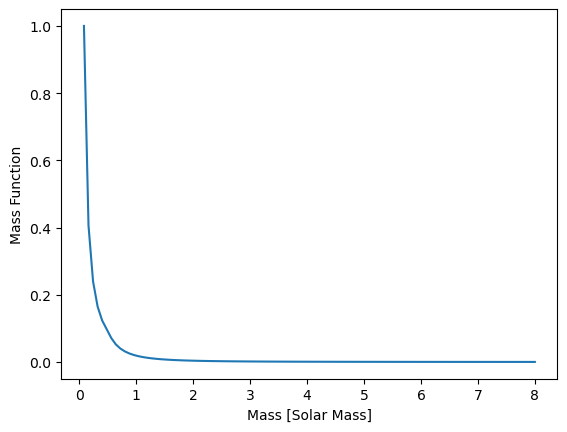

In [6]:
plt.plot(m,imf_aux)
plt.xlabel('Mass [Solar Mass]')
plt.ylabel('Mass Function')

In [7]:
import random
masas = []
starlist = np.random.uniform(0.08,10,1000000)
p_r = np.random.uniform(0,1,1000000) #Pr
for mass,p in zip(starlist,p_r):
    p_m = imf(mass)
    if p_m > p:
        masas.append(mass)

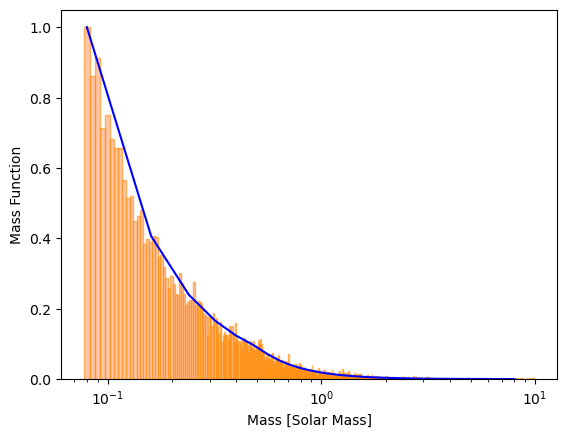

In [8]:
counts, bins, _ = plt.hist(masas,bins = 2000,density=True, alpha = 0.6)
plt.close()
plt.bar(bins[:-1],counts/counts.max(), width = np.diff(bins), alpha = 0.6, color = "lightsalmon", edgecolor = 'darkorange')
plt.plot(m,[imf(n) for n in m],color = 'blue')
plt.xlabel('Mass [Solar Mass]')
plt.ylabel('Mass Function')
plt.xscale('log')
plt.show()

In [9]:
len(masas)

15113

In [10]:
from scipy.interpolate import interp1d

In [11]:
edad = np.random.uniform(0,10,len(masas))
edad = edad.tolist()

In [12]:
mean = [0.04,0.03,-0.08,-0.12,-0.32]
sigma = [0.17,0.15,0.14,0.17,0.24]
age = [1,3,5,7,9]

In [13]:
int_mean = interp1d(age, mean, kind='linear', fill_value="extrapolate")
int_sigma = interp1d(age, sigma, kind='linear', fill_value="extrapolate")

#int2_mean = int_mean(edad)
#int2_sigma = int_sigma(edad)

f = []
for i in edad:
    med = int_mean(i)
    sig = int_sigma(i)
    feh=np.random.normal(med, sig, 1)
    f.append(feh)

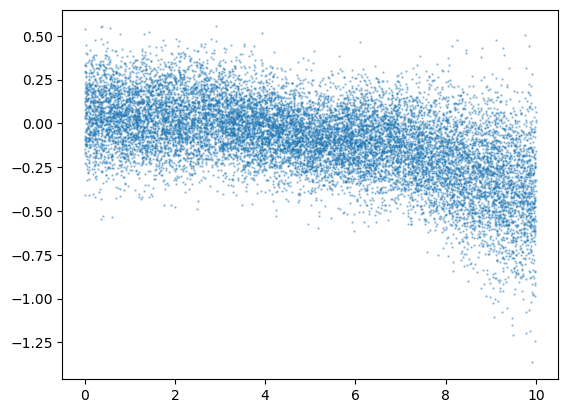

In [14]:
plt.scatter(edad,f, s = 0.5, alpha=0.4)

In [15]:
z = []
for i in f:
    metallicity = np.exp(i)*0.012
    z.append(metallicity[0])

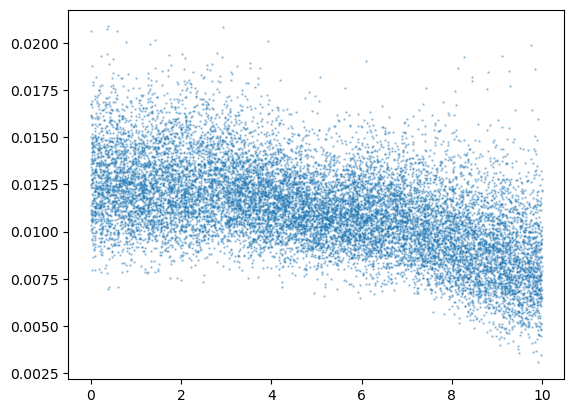

In [16]:
plt.scatter(edad,z, s = 0.5, alpha=0.4)

In [17]:
m = np.array(masas)

In [18]:
print(type(masas[0]))

<class 'numpy.float64'>


In [19]:
z = np.array(z)

In [20]:
print(type(z[0]))

<class 'numpy.float64'>


In [21]:
t = np.array(edad)

In [22]:
print(type(t[0]))

<class 'numpy.float64'>


In [23]:
mask = m >= 0.1
m = m[mask]
z = z[mask]
t = t[mask]

In [24]:
print(len(m))
print(len(z))
print(len(t))

13305
13305
13305


In [25]:
file_path = '/home/enanas_blancas/SSE/evolve.in'

file = open(file_path, 'r+')
try:
    lines = file.readlines()
    for i in range(min(len(m), len(z))):
        first_line = lines[0].strip().split()
        first_line[0] = str(m[i])
        first_line[1] = str(z[i])
        first_line[2] = str((10-t[i])*1000)
        lines[0] = ' '.join(first_line) + '\n'

        file.seek(0)
        file.writelines(lines)
        os.chdir('/home/enanas_blancas/SSE/')
        !./sse > /dev/null 2>&1
        
        fol_name = f"M{m[i]:.3f}Z{z[i]:.3f}T{t[i]*1000:.3f}"
        os.chdir('/home/enanas_blancas/SSE/stars')
        os.mkdir(fol_name)
        path = f"/home/enanas_blancas/SSE/stars/{fol_name}"
        shutil.copy('/home/enanas_blancas/SSE/evolve.dat', path)

finally:
    file.close()

In [26]:
stars_dir = '/home/enanas_blancas/SSE/stars/'

co_wd_file = '/home/enanas_blancas/SSE/WD/CO_WD.txt'
on_wd_file = '/home/enanas_blancas/SSE/WD/ON_WD.txt'
co_in_file = '/home/enanas_blancas/SSE/WD/CO_IN.txt'
on_in_file = '/home/enanas_blancas/SSE/WD/ON_IN.txt'

log_file = '/home/enanas_blancas/SSE/WD/log.txt' # para debuggear

with open(co_wd_file, 'w') as co_file, open(on_wd_file, 'w') as on_file, open(co_in_file, 'w') as co_in, open(on_in_file, 'w') as on_in, open(log_file, 'w') as log:

    for folder_name in os.listdir(stars_dir):
        folder_path = os.path.join(stars_dir, folder_name)
        evolve_file_path = os.path.join(folder_path, 'evolve.dat')

        log.write(f"Processing folder: {folder_path}\n")  # carpeta en proceso

        if os.path.exists(evolve_file_path):
            log.write(f"Found file: {evolve_file_path}\n")  # verificar si se encontro el archivo

            with open(evolve_file_path, 'r') as file:
                lines = file.readlines()

                if not lines:
                    log.write(f"Warning: The file {evolve_file_path} is empty.\n")  # verificar que no este vacio
                else:
                    header = lines[0] # nos saltamos el encabezado
                    log.write(f"Header: {header.strip()}\n")  # lo dejamos guardado al inicio del log file

                    # Procesando las líneas
                    for line in lines[1:]:  # Empezamos desde la segunda línea (sin encabezado)
                        columns = line.split()

                        # verificar que el número de líneas es correcto
                        if len(columns) != 11:
                            log.write(f"Warning: Line with unexpected number of columns: {line.strip()}\n")
                            continue
                        
                        try:
                            # Separamos los elementos de la columna 'type'
                            star_type_str = columns[1].strip()
                            
                            # Verificar que 'type' sea un entero
                            star_type = star_type_str

                            # Log the line and type for debugging
                            log.write(f"Found type: {star_type}, Line: {line.strip()}\n")

                            # Escribimos en los output files
                            #if star_type == '10.0000':
                                #he_file.write(lines[-2])
                                #he_in.write(lines[1])
                                #break
                            if star_type == '11.0000':
                                co_file.write(lines[-2])
                                co_in.write(lines[1])
                                break
                            elif star_type == '12.0000':
                                on_file.write(lines[-2])
                                on_in.write(lines[1])
                                break
                        except ValueError:
                            # Verificar que no hayan errores con la conversión a entero
                            log.write(f"Warning: Unable to convert '{columns[1]}' to an integer in line: {line.strip()}\n")
                            continue
        else:
            log.write(f"Warning: {evolve_file_path} not found.\n")  # Log if the file is not found

print("Processing complete. Details are logged in log.txt.")


Processing complete. Details are logged in log.txt.
